Episode: 100, Total Reward: 8.0, Epsilon: 0.6058
Episode: 200, Total Reward: 8.5, Epsilon: 0.3670
Episode: 300, Total Reward: 9.1, Epsilon: 0.2223
Episode: 400, Total Reward: 9.1, Epsilon: 0.1347
Episode: 500, Total Reward: 9.1, Epsilon: 0.0816
Episode: 600, Total Reward: 9.3, Epsilon: 0.0494
Episode: 700, Total Reward: 9.3, Epsilon: 0.0299
Episode: 800, Total Reward: 9.2, Epsilon: 0.0181
Episode: 900, Total Reward: 9.3, Epsilon: 0.0110
Episode: 1000, Total Reward: 9.3, Epsilon: 0.0100

Learned Q-Table:
[[[ 3.72362432e+00  3.69725093e+00  3.69997716e+00  4.26126590e+00]
  [ 4.25130305e+00  4.84585100e+00  3.71771161e+00  3.69000641e+00]
  [ 2.01731385e+00  1.83410910e+00  4.25376920e+00  2.42970873e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.25290132e-01  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 4.25208173e+00  5.49539000e+00  4.83414679e+00  4.84136796e+00]
  [ 0.0000000

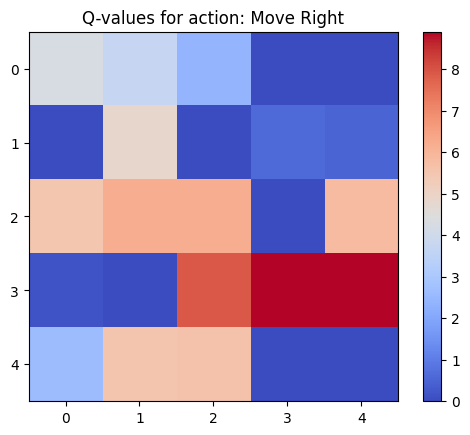

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# env
maze = np.array([
    [0, 0, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 2]  # 2 represents the goal
])

# Parameters
rows, cols = maze.shape
num_actions = 4  # up, down, left, right

# Action mappings (up, down, left, right)
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}

# Q-table: initialize with zeros
q_table = np.zeros((rows, cols, num_actions))

# Hyperparameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 1000
max_steps = 100  # Max steps per episode

# Reward definition
def get_reward(state):
    if maze[state] == 2:
        return 10  # Reward for reaching the goal
    elif maze[state] == 1:
        return -5  # Penalty for hitting an obstacle
    else:
        return -0.1  # Small penalty for each step to encourage faster solutions

# Check if the state is valid (not out of bounds or obstacle)
def is_valid(state):
    row, col = state
    return 0 <= row < rows and 0 <= col < cols and maze[row, col] != 1

# Get next state given action
def get_next_state(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if is_valid(next_state):
        return next_state
    else:
        return state  # If invalid move, stay in the same position

# Q-learning algorithm
for episode in range(episodes):
    state = (0, 0)  # Start from the top-left corner
    total_reward = 0

    for step in range(max_steps):
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) < epsilon:
            action = random.choice(list(actions.keys()))  # Explore: random action
        else:
            action = np.argmax(q_table[state[0], state[1]])  # Exploit: choose best action

        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        # Q-learning update
        old_q_value = q_table[state[0], state[1], action]
        best_future_q = np.max(q_table[next_state[0], next_state[1]])
        q_table[state[0], state[1], action] = old_q_value + alpha * (reward + gamma * best_future_q - old_q_value)

        total_reward += reward
        state = next_state

        if maze[state] == 2:  # Goal reached
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Optionally print the progress
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.4f}")

# Display the learned Q-values
print("\nLearned Q-Table:")
print(q_table)

# Visualization of agent's learned policy (best action in each state)
policy = np.zeros((rows, cols), dtype=str)
for row in range(rows):
    for col in range(cols):
        if maze[row, col] == 1:
            policy[row, col] = 'X'  # Obstacle
        elif maze[row, col] == 2:
            policy[row, col] = 'G'  # Goal
        else:
            best_action = np.argmax(q_table[row, col])
            policy[row, col] = ['↑', '↓', '←', '→'][best_action]

print("\nLearned Policy:")
print(policy)

# Optional: Plot a heatmap of Q-values for one action (e.g., move right)
plt.imshow(q_table[:, :, 3], cmap='coolwarm')  # Action 3 corresponds to moving right
plt.colorbar()
plt.title('Q-values for action: Move Right')
plt.show()
